In [109]:
%matplotlib inline
import time
import pandas
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import itertools
import pandas as pd

from pomegranate import *

random.seed(0)
numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

#%load_ext watermark
#%watermark -m -n -p numpy,scipy,pomegranate

# Distribution

In [3]:
model = NormalDistribution(5, 1)

In [4]:
print(model.probability([4., 5., 6., 7.]))
print(model.log_probability([4., 5., 6., 7.]))

[0.24197072 0.39894228 0.24197072 0.05399097]
[-1.41893853 -0.91893853 -1.41893853 -2.91893853]


In [5]:
X = np.array([1,2,3,4,5,6,7,8, 1, 2, 3])

In [6]:
np.mean(X)
np.std(X)

2.289032420366213

In [7]:
# Fits completley changes the values of the distribution

In [8]:
model.fit(X)

In [9]:
model

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        3.8181818181818183,
        2.2890324203662127
    ],
    "frozen" : false
}

In [10]:
model.fit([1])

In [11]:
NormalDistribution.from_samples([1,2,3,4])

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        2.5,
        1.118033988749895
    ],
    "frozen" : false
}

## General Mixture Model

In [12]:
X_mixt =  np.random.normal(6, 1, size=(250, 1))
X_mixt = np.array([1,2,3,4,5, 30, 31, 32, 33, 34, 35, 90, 91, 92, 93, 94, 95]).reshape(-1, 1)

In [13]:
model = GeneralMixtureModel.from_samples(NormalDistribution, 3, X_mixt)

In [14]:
model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                3.0,
                1.4142135623730951
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                92.5,
                1.7078251276597556
            ],
            "frozen" : false
        },
        {
            "class" : "Distribution",
            "name" : "NormalDistribution",
            "parameters" : [
                32.5,
                1.7078251276599552
            ],
            "frozen" : false
        }
    ],
    "weights" : [
        0.29411764705882354,
        0.35294117647058826,
        0.35294117647058826
    ]
}

## Exponential Distribution
[Exponential Distribution](https://openstax.org/books/introductory-business-statistics/pages/5-3-the-exponential-distribution)
> The exponential distribution is often concerned with the amount of time until some specific event occurs.

In [85]:
d1 = ExponentialDistribution(5.0)
d2 = ExponentialDistribution(0.3)
d3 = ExponentialDistribution(1.5)

In [86]:
model = GeneralMixtureModel([d1, d2, d3])

In [92]:
X = numpy.random.exponential(3, size=(10,1))
X

array([[0.23008038],
       [2.02572367],
       [3.79286211],
       [4.01996808],
       [7.10919304],
       [4.82629595],
       [1.11723891],
       [2.07006493],
       [3.6298294 ],
       [0.44702074]])

In [90]:
# Result of the predict is argmax
model.predict(X)

array([1, 1, 1, 2, 1, 1, 1, 0, 1, 1], dtype=int32)

>  Calculate the posterior P(M|D) for each sample and return the index
   of the component most likely to fit it. This corresponds to a simple argmax over the responsibility matrix.

In [91]:
results = model.predict_proba(X)
results

array([[0.00000008, 0.96311225, 0.03688766],
       [0.00000002, 0.97563452, 0.02436546],
       [0.        , 0.99907959, 0.00092041],
       [0.30704839, 0.18326159, 0.50969002],
       [0.0001308 , 0.79108012, 0.20878908],
       [0.00374404, 0.59739455, 0.39886141],
       [0.        , 0.99951371, 0.00048629],
       [0.4444887 , 0.12763069, 0.42788061],
       [0.        , 0.99999767, 0.00000233],
       [0.        , 0.99723948, 0.00276052]])

In [32]:
model = ExponentialDistribution(0.5)

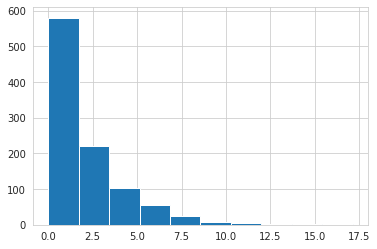

In [33]:
model.plot()

In [35]:
model.probability(1.)

0.3032653298563167

In [36]:
model.probability(5.0)

0.04104249931194939

## Naive Bayes

In sklearn, we can only choose Naive Bayes models with Gaussian or Multinomial probability distributions.
 * Multinonmial = counts
 * Gaussian = continuous features
 
[Difference between naive Bayes & multinomial naive Bayes](https://stats.stackexchange.com/questions/33185/difference-between-naive-bayes-multinomial-naive-bayes)

In pomegranate, we can define naive Bayes model using arbitrary distributions.

In [94]:
X = numpy.random.normal(5, 1, size=(100, 2))
X[50:] += 1

y = numpy.zeros(100)
y[50:] = 1

model1 = NaiveBayes.from_samples(NormalDistribution, X, y)
model2 = NaiveBayes.from_samples(LogNormalDistribution, X, y)

Each feature can be modelled with own distribution.

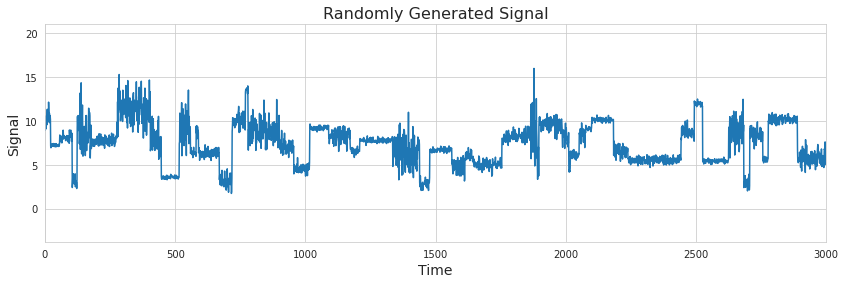

In [96]:
mu = numpy.random.normal(7, 2, size=1000)
std = numpy.random.lognormal(-0.8, 0.8, size=1000)
dur = numpy.random.exponential(50, size=1000)

data = numpy.concatenate([numpy.random.normal(mu_, std_, int(t)) for mu_, std_, t in zip(mu, std, dur)])

plt.figure(figsize=(14, 4))
plt.title("Randomly Generated Signal", fontsize=16)
plt.plot(data)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Signal", fontsize=14)
plt.xlim(0, 3000)
plt.show()

In [97]:
# Duration oznacza czas trwania segmentu
# Każdy segment ma swoje odchylenie i średnią

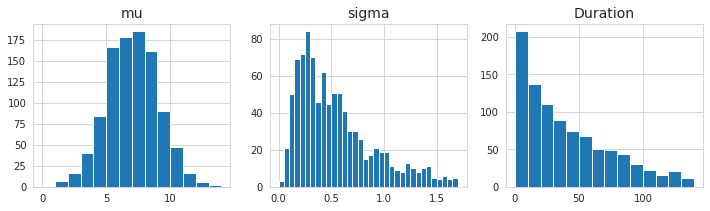

In [99]:
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("mu", fontsize=14)
plt.hist(mu, bins=numpy.arange(0, 15))

plt.subplot(132)
plt.title("sigma", fontsize=14)
plt.hist(std, bins=numpy.arange(0.00, 1.75, 0.05))

plt.subplot(133)
plt.title("Duration", fontsize=14)
plt.hist(dur, bins=numpy.arange(0, 150, 10))
plt.show()

In [102]:
X1 = numpy.array([numpy.random.normal(7, 2, size=400),
                  numpy.random.lognormal(-0.8, 0.8, size=400),
                  numpy.random.exponential(50, size=400)]).T

X2 = numpy.array([numpy.random.normal(8, 2, size=600),
                  numpy.random.lognormal(-1.2, 0.6, size=600),
                  numpy.random.exponential(100, size=600)]).T

X = numpy.concatenate([X1, X2])
y = numpy.zeros(1000)
y[400:] = 1

# NaiveBayes.from_samples([NormalDistribution, LogNormalDistribution, ExponentialDistribution], X, y)

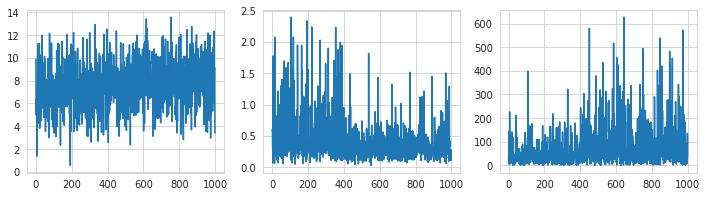

In [107]:
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.plot(X[:, 0])

plt.subplot(132)
plt.plot(X[:, 1])

plt.subplot(133)
plt.plot(X[:, 2])

In [111]:
df = pd.DataFrame.from_records(X)

In [113]:
list(df.columns)

[0, 1, 2]

<AxesSubplot:>

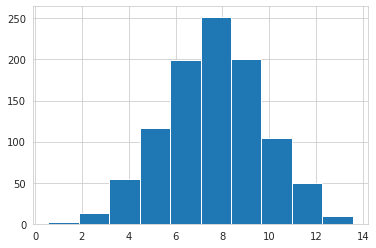

In [114]:
df[0].hist()

<AxesSubplot:>

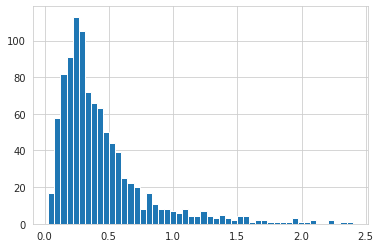

In [118]:
df[1].hist(bins=50)

LogNormal distribution is for non-negative values

[Log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution)

<AxesSubplot:>

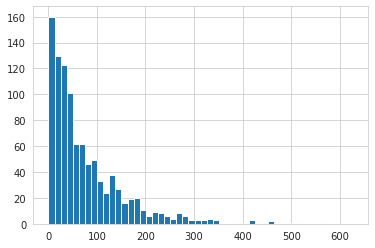

In [119]:
df[2].hist(bins=50)

## Stacking models on top of each other

In [122]:
X = numpy.concatenate([numpy.random.normal((5, 1), 1, size=(200, 2)),
                       numpy.random.normal((6, 4), 1, size=(200, 2)),
                       numpy.random.normal((3, 5), 1, size=(350, 2)),
                       numpy.random.normal((7, 6), 1, size=(250, 2))])

y = numpy.zeros(1000)
y[400:] = 1

model = BayesClassifier.from_samples(MultivariateGaussianDistribution, X, y)
print(model.log_probability(X).sum())


d1 = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 2, X[y == 0])
d2 = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 2, X[y == 1])
model2 = BayesClassifier([d1, d2], [0.4, 0.6])
print(model2.log_probability(X).sum())



-4047.120202695901
-3906.0211241401908


> In this case we build data that **intentionally has 4 clusters**, of which each class is composed of two of the clusters. A simple normal distribution is unlikely to capture this well, but a mixture model is built specifically to model distributions that are composed of multiple parts. We can see that the correspond log probability is much higher when we incorporate the mixture model in. There is an implementation detail that doesn't allow you yet to pass in a compositional model into the from_samples method quite yet, but in this case it is fairly simple to break up the data such that we build the model ourselves.
